<a href="https://colab.research.google.com/github/Bekamtz/projects/blob/main/Predicting_Coronavirus_Infections_WorldWide_USA_%5BBeka_Martinez%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Coronavirus
## What is it?
### It is a new infectious disease that originated in Wuhan, China that has spread worldwide infecting over 8.92M people and killed 467K. 
## How do we predict?
### In order to predict, I took the data over the past 150 days, since January 22, 2020 and predicted the next 15 days. The data has been split into train and test set with test size 30% and training 70%. I used Linear Regression and SVM modeling. 
## Why should I care?
### Although, we are safe in Vietnam from the Coronavirus we are not safe from the economic affects. It's important we are able to predict and learn from our data to make smarter investment choices. While other countries can use this data to make more informed decisions about reopening and the ordering of medical supplies to support their frontline workers. 






Import libraries




In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing as pre
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [ ]:
pd.set_option('display.max_rows', confirmed.shape[0]+1)

In [ ]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975,42033,42159,42297,42463,42609,42795,42969,43035,43240,43468,43681,43924,44177,44363,44503,44706,44988,45174,45384,45600,45723,45844,46116,46274,46717,46980,46718
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210,23705,24206,24731,25294,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459,32196,32761,33556,34300,34944,35600,36245,36790,37625,38182,39014,39719,40501
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800,61381,62051,62693,63446,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755,73774,74862,75867,77000,78025,79110,80168,81212,82221,83199,84152,85084,85927
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135,5319,5383,5437,5477,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142,6207,6256,6304,6351,6428,6534,6610,6610,6712,6745,6790,6842,6904
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223,12335,12433,12680,12816,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267,14413,14493,14634,14742,14821,14920,15008,15087,15103,15139,15251,15319,15361
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,124,124,124,124,124,127,128,128,128,128,130,130,130,131,131,131,131,131,131,133,134,134,134,134,139,139,139,139,139,139,139,140,141,141,141,141,141,142,144,144
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1090589,1102301,1116609,1130533,1143800,1157179,1166924,1173533,1183131,1195276,1205928,1217028,1228814,1236851,1242182,1250499,1262476,1273356,1284519,1296378,1304846,1310491,1318384,1329005,1339337,1349434,1359042,1366182,1370366,1374631,1381795,1390388,1399431,1407277,1413375,1418807,1424533,1432570,1440103,1447732
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,77837,78810,80410,82651,85034,87432,89813,92254,93448,94776,97150,99563,101773,104249,106424,107466,108687,110548,112680,114383,115855,117337,117886,118870,120459,121979,123646,124839,126224,126709,127522,129085,130870,132346,133594,134768,135124,135967,137231,138508
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,115,115,115,115,115,115,115,115,115,116,117,117,117,117,117,117,117
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,4386,4398,4406,4411,4417,4421,4425,4432,4435,4443,4445,4454,4459,4462,4469,4469,4469,4469,4469,4469,

In [ ]:
confirmed=confirmed[confirmed['Country/Region']=="US"]

In [ ]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20
246,NaN,US,40.0,-100.0,1,1,2,2,5,5,5,6,6,8,8,8,11,11,11,12,12,12,12,12,13,13,14,14,14,14,14,14,14,14,16,16,16,16,16,16,...,8634210,8700789,8776790,8855474,8945642,9044161,9133045,9208607,9292091,9416709,9519582,9645772,9771480,9899480,10009386,10130752,10268446,10411994,10573242,10750810,10917519,11053304,11211070,11371585,11541986,11729949,11925959,12104032,12246766,12418228,12591163,12772653,12883264,13088821,13244687,13383320,13541221,13721858,13921913,14139577


Clean up the Data

In [ ]:
columns = confirmed.keys()
confirmed = confirmed.loc[:, columns[4]:columns[-1]]
dates = confirmed.keys()
world_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    world_cases.append(confirmed_sum)
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
# fix and reshape data
  

In [ ]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20
246,1,1,2,2,5,5,5,6,6,8,8,8,11,11,11,12,12,12,12,12,13,13,14,14,14,14,14,14,14,14,16,16,16,16,16,16,17,17,25,32,...,8634210,8700789,8776790,8855474,8945642,9044161,9133045,9208607,9292091,9416709,9519582,9645772,9771480,9899480,10009386,10130752,10268446,10411994,10573242,10750810,10917519,11053304,11211070,11371585,11541986,11729949,11925959,12104032,12246766,12418228,12591163,12772653,12883264,13088821,13244687,13383320,13541221,13721858,13921913,14139577


In [ ]:
# Set days in the future and reshape 
days_in_future = 15
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-15]

In [ ]:
#Fix the dates
import datetime
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

Split and get to testing 

In [ ]:
#used day's since as X and y as world cases sum'd since we can't trust individual country data
# test size = 30% 

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.30, shuffle=False) 

Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))
# Uh oh these are pretty high

MAE: 2642205.596914664
MSE: 9434466561598.367


In [ ]:
# The postive Coef tells us that we will be increasing EEEEEK 
print(linear_model.coef_)
print(linear_model.intercept_)

[[27247.01037722]]
[-1206234.29986548]


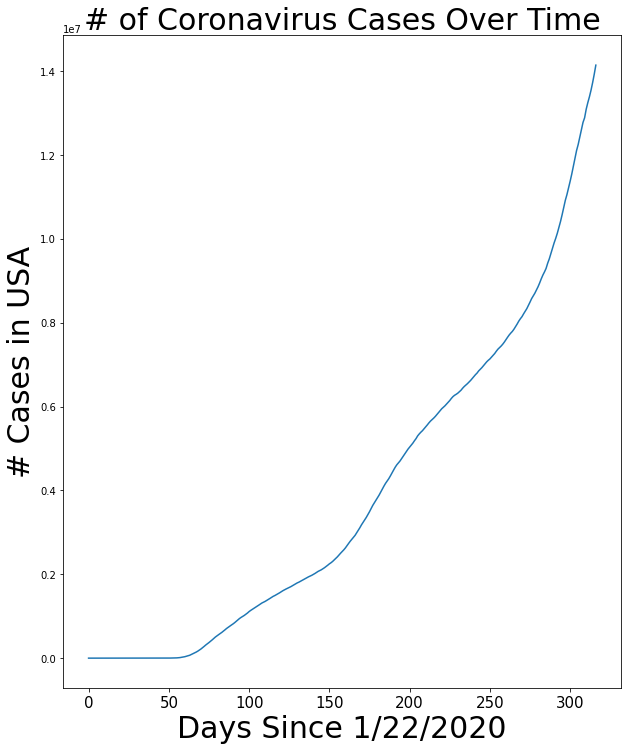

In [ ]:
plt.figure(figsize=(10, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# Cases in USA', size=30)
plt.xticks(size=15)
plt.show()

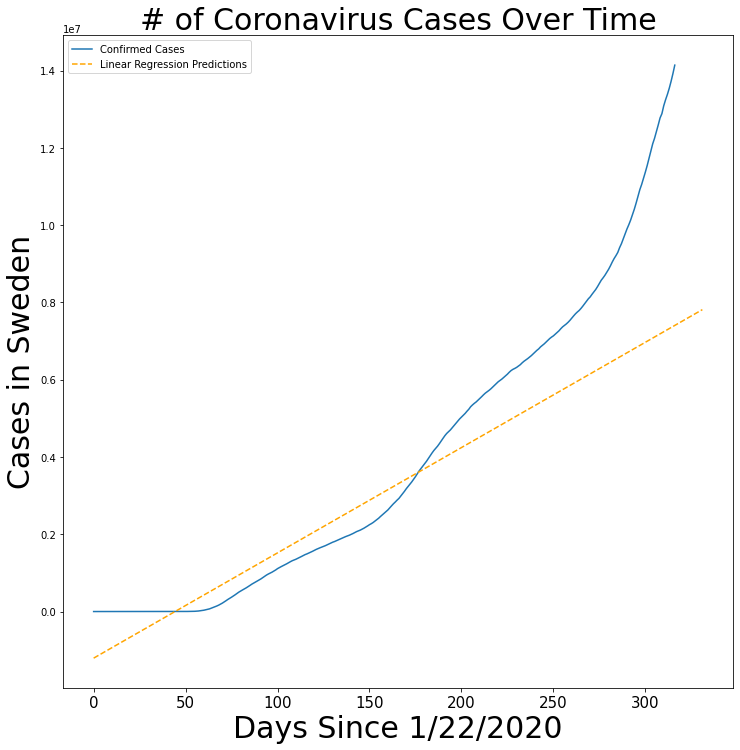

In [ ]:
plt.figure(figsize=(12, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Cases in Sweden', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
predictions = linear_model.predict(X_test_confirmed)
print('# of confirmed cases after 15 days', predictions[-1])

# of confirmed cases after 15 days [132912.85525365]


Predicting Using SVM 

In [ ]:
## Run through all possible values to find the best one for my model 
kernel = ['poly', 'sigmoid']
c = [0.01]
gamma = [0.01, 0.1]
epsilon = [ 1]
shrinking = [False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=40. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01], 'epsilon': [1],
                                        'gamma': [0.01, 0.1],
                                        'kernel': ['poly', 'sigmoid'],
                                        'shrinking': [False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
# Find which one is the best!
svm_search.best_params_
# High C value, for large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.
# low epsilon means it's not allowing many errors with higher penalities 
# Low gamma means highly influenced by the training model 
# decision boundary: poly
### {'C': 0.01, 'epsilon': 1, 'gamma': 0.1, 'kernel': 'poly', 'shrinking': False}

{'C': 0.01, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'poly', 'shrinking': False}

In [ ]:
#Predict 
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forcast)

In [ ]:
print('# of confirmed cases after 15 days', svm_pred[-1])

# of confirmed cases after 15 days 401866.10359891155


In [ ]:
print('# of confirmed cases after 15 days', svm_pred[156])

# of confirmed cases after 15 days 45523.88939700226


MAE: 96024.37857437054
MSE: 9965667086.654415


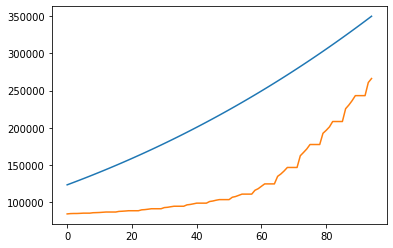

In [ ]:
# checking against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))
### Super high again EEEK

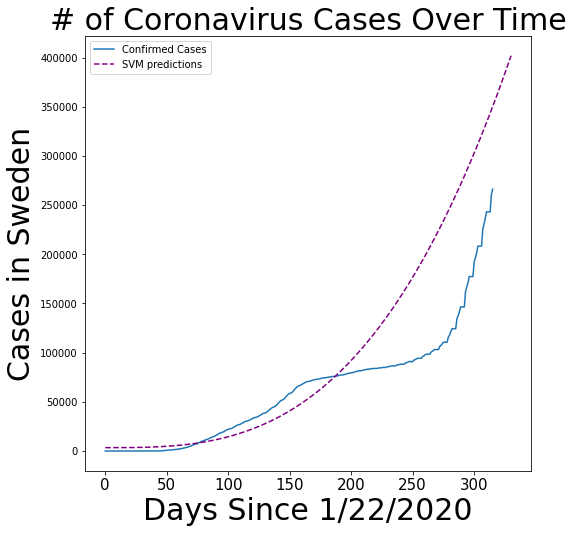

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Cases in Sweden', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.show()

#Conclusion:
The Coronavirus growth doesn't look like it is slowing down at any rate at this moment, in 15 days our SVM model predicts 15m cases. Goverments should continue practicing strict lockdown and social distancing measuring while restricting travel. Individuals should plan and budget for the upcoming year, our global economy will likely not recover quickly, so hold off on big purchases and frivilous spending. 

![No!](https://www.kxan.com/wp-content/uploads/sites/40/2020/04/Image-from-iOS-5-5.jpg?w=2560&h=1440&crop=1)